## Moving Average Process

In [1]:
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [3]:
plt.rcParams['figure.figsize'] = (10, 7.5)

### Simulate MA(2) Process

$ y_t = 0.9Z_{t-1} + 0.3Z_{t-2} $

In [9]:
ma2 = np.array([1, 0.9, 0.3])


#####   autoregressive #####
ar2 = np.array([1, 0, 0])


print(ma2)
print(ar2)

[1.  0.9 0.3]
[1 0 0]


In [11]:
MA2_process = ArmaProcess(ar2, ma2).generate_sample(nsample=1000)

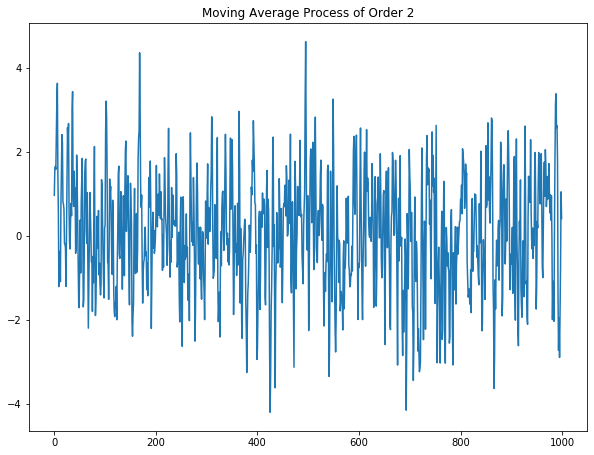

In [13]:
plt.plot(MA2_process)
plt.title('Moving Average Process of Order 2')
plt.show()

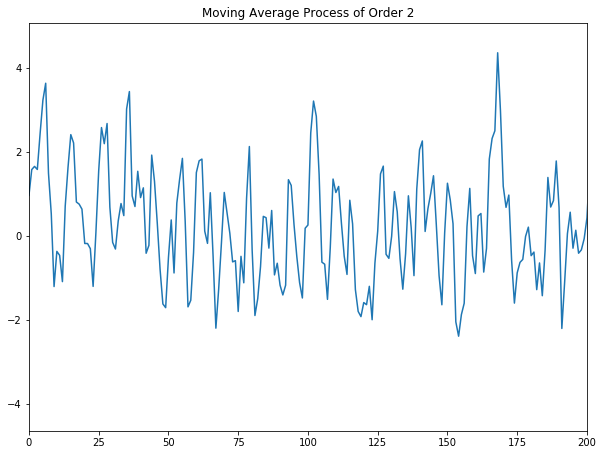

In [14]:
plt.plot(MA2_process)
plt.title('Moving Average Process of Order 2')
plt.xlim(0, 200)
plt.show()

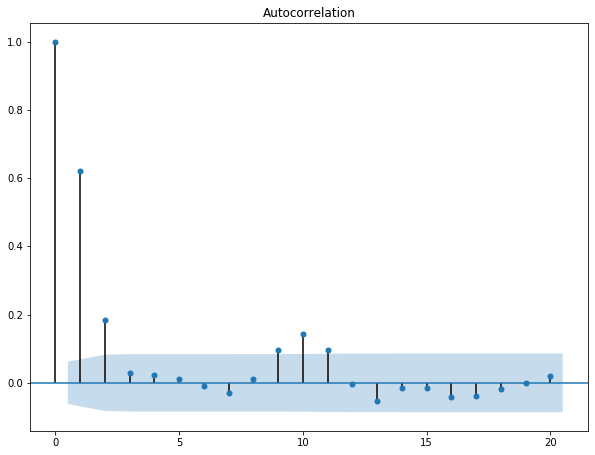

In [17]:
#####   if the ACF of an Am process purely a Ma process, we should not see significant peaks after the order 2    #####

plot_acf(MA2_process, lags=20);

In [21]:
#####   we model our simulatio to see if we can get back 0.9 and 0.3.    #####


MA_model = ARIMA(MA2_process, order=(0,0,2), enforce_stationarity=False).fit()

print(MA_model.summary())



#####    we got " ma.L1          0.8714 " and " ma.L2          0.2963 ".    #####

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(0, 0, 2)   Log Likelihood               -1406.421
Date:                Mon, 10 Jun 2024   AIC                           2820.842
Time:                        09:57:29   BIC                           2840.461
Sample:                             0   HQIC                          2828.300
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0482      0.069      0.703      0.482      -0.086       0.183
ma.L1          0.8714      0.031     28.105      0.000       0.811       0.932
ma.L2          0.2963      0.030      9.805      0.0